In [18]:
import  torch
from torch import nn

# flatten
PyTorch 中的 nn.Flatten 是一个用于展平输入张量的神经网络层，通常用于连接多维输出层（如卷积层）和一维输入层（如全连接层）。

start_dim=1, end_dim=-1 start_dim展开的起始维度，end_dim展开的结束维度。其余维度保持

In [19]:
input = torch.randn(32, 2, 5, 5)
# With default parameters
m = nn.Flatten()
output = m(input)
print(output.size())
# torch.Size([32, 50])
# With non-default parameters
m = nn.Flatten(0, 2)
output = m(input)
print(output.size())
# torch.Size([320, 5])
input2 = torch.randn(2, 3, 4, 5)
m = nn.Flatten(2,3)
output = m(input2)
print(output.size())

torch.Size([32, 50])
torch.Size([320, 5])
torch.Size([2, 3, 20])


In [20]:
m = nn.ELU()
input = torch.randn(2)
output = m(input)
print(input)
print(output)

tensor([ 0.8110, -0.2325])
tensor([ 0.8110, -0.2074])


In [21]:
m = nn.ReLU()
input = torch.randn(2)
output = m(input)
print(input)
print(output)

# An implementation of CReLU - https://arxiv.org/abs/1603.05201

m = nn.ReLU()
input = torch.randn(2).unsqueeze(0)
output = torch.cat((m(input), m(-input)))
print(output)

tensor([-0.9974, -0.4478])
tensor([0., 0.])
tensor([[0.9192, 0.0000],
        [0.0000, 0.1897]])


In [22]:
from torch import nn
import torch

# Linear
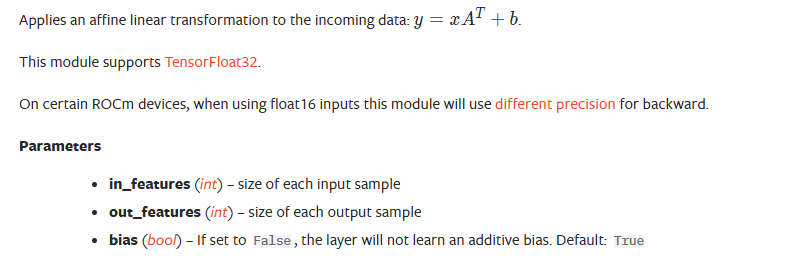

In [23]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


# 池化层



In [24]:
# pool of square window of size=3, stride=2
m1 = nn.MaxPool2d(2, stride=2,dilation=2)
print(m1)
input = torch.randn(1,9, 9)
print(input[0])
output = m1(input)
print(output.size())
print(output)
# pool of non-square window
# m = nn.MaxPool2d((3, 2), stride=(2, 1))
# input = torch.randn(20, 16, 50, 32)
# output = m(input)
# print(output)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=2, ceil_mode=False)
tensor([[-1.6052,  1.5509, -1.2073, -0.1178, -0.6351,  0.5582, -2.4511, -0.4859,
          2.1019],
        [-0.8739, -2.2618, -0.8592,  0.6609, -0.7679, -1.1722,  0.5370,  0.9151,
          0.3336],
        [ 1.3977,  1.1326,  1.4163, -0.1368,  1.7052,  0.4936,  0.3248, -0.9160,
          1.0866],
        [ 0.9224, -0.2704, -1.0638,  0.9999,  2.4015, -1.4487, -0.5122, -1.6146,
          0.7749],
        [-0.7156,  1.7304, -0.5816, -0.8318, -0.8249,  0.4344,  1.2567, -0.4566,
          0.5439],
        [-0.0514,  0.8319, -0.2899,  0.0555,  0.8758,  0.6779,  0.6512,  1.9000,
          0.9582],
        [-1.1537, -0.6615, -1.4161, -0.5281,  1.1040,  0.4522,  2.3275, -0.2949,
         -0.8004],
        [ 1.9078,  0.5035,  1.4593,  0.7005, -0.0732, -0.5806, -1.4978, -1.0919,
         -1.0791],
        [-2.8059, -2.0971, -0.3782,  0.2802, -1.8015, -0.4311,  0.4140,  0.6448,
         -0.1364]])
torch.Size([1, 4, 4])
te

池化层手写实现


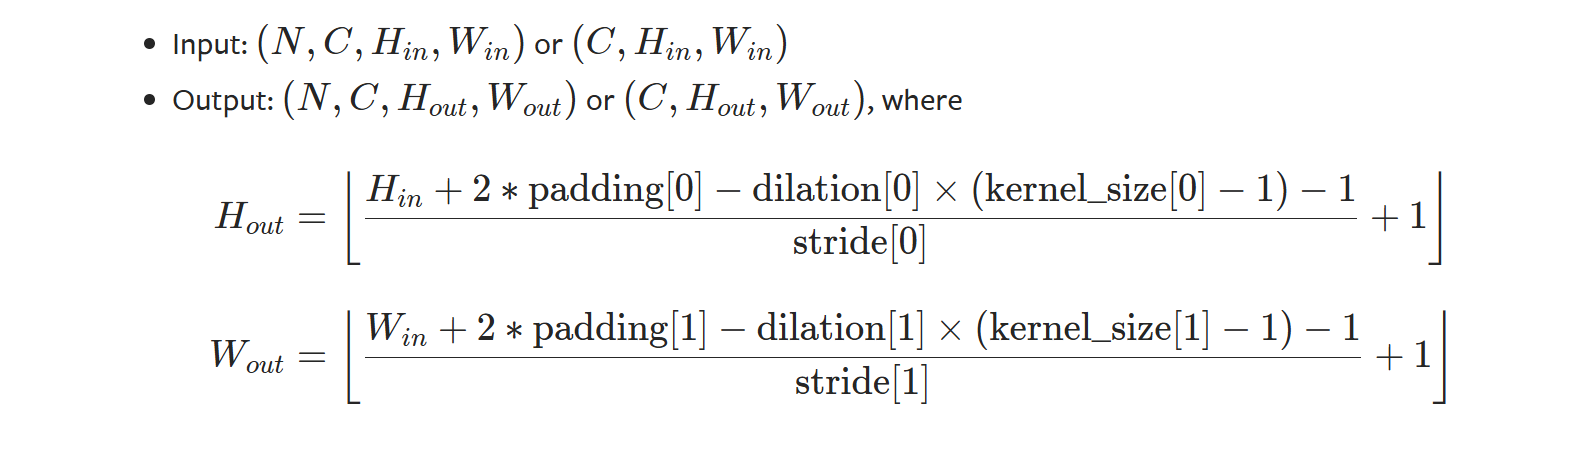

In [25]:
import torch
import torch.nn.functional as F

def custom_maxpool2d(input_tensor, kernel_size, stride=None, padding=0, dilation=1):
    """
    手动实现最大池化操作，支持 kernel_size、stride、padding 和 dilation 参数

    参数:
        input_tensor (Tensor): 输入张量 (B, C, H, W)
        kernel_size (int or tuple): 池化窗口大小
        stride (int or tuple): 滑动步长，默认为 kernel_size
        padding (int or tuple): 边缘填充大小
        dilation (int or tuple): 窗口元素间的间隔

    返回:
        Tensor: 最大池化后的张量
    """
    # 参数标准化处理
    kernel_size = _pair(kernel_size)
    stride = _pair(stride) if stride is not None else kernel_size
    padding = _pair(padding)
    dilation = _pair(dilation)

    # 处理 batch 和 channel 维度
    batch_size, channels, in_height, in_width = input_tensor.shape

    # 计算输出尺寸
    out_height = (in_height + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    out_width = (in_width + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1

    # 填充输入张量
    padded_input = F.pad(input_tensor, (padding[1], padding[1], padding[0], padding[0]), value=-float('inf'))

    # 创建输出张量
    output = torch.full((batch_size, channels, out_height, out_width), -float('inf'))

    # 手动实现最大池化操作
    for b in range(batch_size):
        for c in range(channels):
            for i in range(out_height):
                for j in range(out_width):
                    # 计算池化窗口的起始位置
                    h_start = i * stride[0]
                    w_start = j * stride[1]

                    # 计算池化窗口的实际位置（考虑 dilation）
                    window = padded_input[b, c,
                                         h_start: h_start + dilation[0] * (kernel_size[0] - 1) + 1: dilation[0],
                                         w_start: w_start + dilation[1] * (kernel_size[1] - 1) + 1: dilation[1]]

                    # 获取窗口内的最大值
                    output[b, c, i, j] = window.max()

    return output

def _pair(x):
    """将输入转换为 (height, width) 的元组格式"""
    if isinstance(x, int):
        return (x, x)
    if isinstance(x, tuple):
        if len(x) == 1:
            return (x[0], x[0])
        if len(x) == 2:
            return x
    raise ValueError(f"输入值应为整数或元组，但实际是 {type(x)}: {x}")

# 测试函数
def test_custom_maxpool():
    """测试 custom_maxpool2d 功能"""
    print("="*50)
    print("开始测试自定义最大池化函数")
    print("="*50)

    # 创建测试张量 (1 batch, 1 channel, 6x6)
    input_data = torch.tensor([
        [[
            [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
            [7.0, 8.0, 9.0, 10.0, 11.0, 12.0],
            [13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
            [19.0, 20.0, 21.0, 22.0, 23.0, 24.0],
            [25.0, 26.0, 27.0, 28.0, 29.0, 30.0],
            [31.0, 32.0, 33.0, 34.0, 35.0, 36.0]
        ]]
    ], dtype=torch.float32)

    print("\n原始输入数据 (6×6):")
    print(input_data[0, 0])

    # 测试1: 基本池化 (2x2 kernel, stride=2)
    print("\n测试1: kernel_size=2, stride=2")
    result1 = custom_maxpool2d(input_data, kernel_size=2, stride=2)
    builtin1 = F.max_pool2d(input_data, kernel_size=2, stride=2)
    print("\n自定义实现结果:")
    print(result1[0, 0])
    print("\n内置函数结果:")
    print(builtin1[0, 0])
    print(f"结果是否一致: {torch.allclose(result1, builtin1, atol=1e-6)}")

    # 测试2: 带填充的池化 (3x3 kernel, padding=1, stride=1)
    print("\n测试2: kernel_size=3, padding=1, stride=1")
    result2 = custom_maxpool2d(input_data, kernel_size=3, padding=1, stride=1)
    builtin2 = F.max_pool2d(input_data, kernel_size=3, padding=1, stride=1)
    print("\n自定义实现结果:")
    print(result2[0, 0])
    print("\n内置函数结果:")
    print(builtin2[0, 0])
    print(f"结果是否一致: {torch.allclose(result2, builtin2, atol=1e-6)}")

    # 测试3: 带dilation的池化 (2x2 kernel, dilation=2, stride=1)
    print("\n测试3: kernel_size=2, dilation=2, stride=1")
    result3 = custom_maxpool2d(input_data, kernel_size=2, dilation=2, stride=1)
    builtin3 = F.max_pool2d(input_data, kernel_size=2, dilation=2, stride=1)
    print("\n自定义实现结果:")
    print(result3[0, 0])
    print("\n内置函数结果:")
    print(builtin3[0, 0])
    print(f"结果是否一致: {torch.allclose(result3, builtin3, atol=1e-6)}")

    # 测试4: 复杂情况 (3x3 kernel, padding=1, dilation=2, stride=2)
    print("\n测试4: kernel_size=3, padding=1, dilation=2, stride=2")
    result4 = custom_maxpool2d(input_data, kernel_size=3, padding=1, dilation=2, stride=2)
    builtin4 = F.max_pool2d(input_data, kernel_size=3, padding=1, dilation=2, stride=2)
    print("\n自定义实现结果:")
    print(result4[0, 0])
    print("\n内置函数结果:")
    print(builtin4[0, 0])
    print(f"结果是否一致: {torch.allclose(result4, builtin4, atol=1e-6)}")

# 运行测试
if __name__ == "__main__":
    test_custom_maxpool()


开始测试自定义最大池化函数

原始输入数据 (6×6):
tensor([[ 1.,  2.,  3.,  4.,  5.,  6.],
        [ 7.,  8.,  9., 10., 11., 12.],
        [13., 14., 15., 16., 17., 18.],
        [19., 20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36.]])

测试1: kernel_size=2, stride=2

自定义实现结果:
tensor([[ 8., 10., 12.],
        [20., 22., 24.],
        [32., 34., 36.]])

内置函数结果:
tensor([[ 8., 10., 12.],
        [20., 22., 24.],
        [32., 34., 36.]])
结果是否一致: True

测试2: kernel_size=3, padding=1, stride=1

自定义实现结果:
tensor([[ 8.,  9., 10., 11., 12., 12.],
        [14., 15., 16., 17., 18., 18.],
        [20., 21., 22., 23., 24., 24.],
        [26., 27., 28., 29., 30., 30.],
        [32., 33., 34., 35., 36., 36.],
        [32., 33., 34., 35., 36., 36.]])

内置函数结果:
tensor([[ 8.,  9., 10., 11., 12., 12.],
        [14., 15., 16., 17., 18., 18.],
        [20., 21., 22., 23., 24., 24.],
        [26., 27., 28., 29., 30., 30.],
        [32., 33., 34., 35., 36., 36.],
        [32., 3

# panding层

ReflectionPad2d 是 PyTorch 中用于处理二维数据（如图像）的边界填充层，通过镜像反射输入张量的边缘像素来扩展边界。以下是其核心用法详解

- 以输入张量的边界像素为对称轴，将内部像素按镜像方式复制到外部。
例如：输入张量边缘像素为 [A, B, C]，则填充后的左侧边界会镜像为 [B, A, B, C, ...]，避免边缘信息丢失
。
- 用途：在卷积神经网络（CNN）中保持特征图尺寸不变，同时减少边缘效应（如信息损失或伪影），常见于图像分割、风格迁移等任务

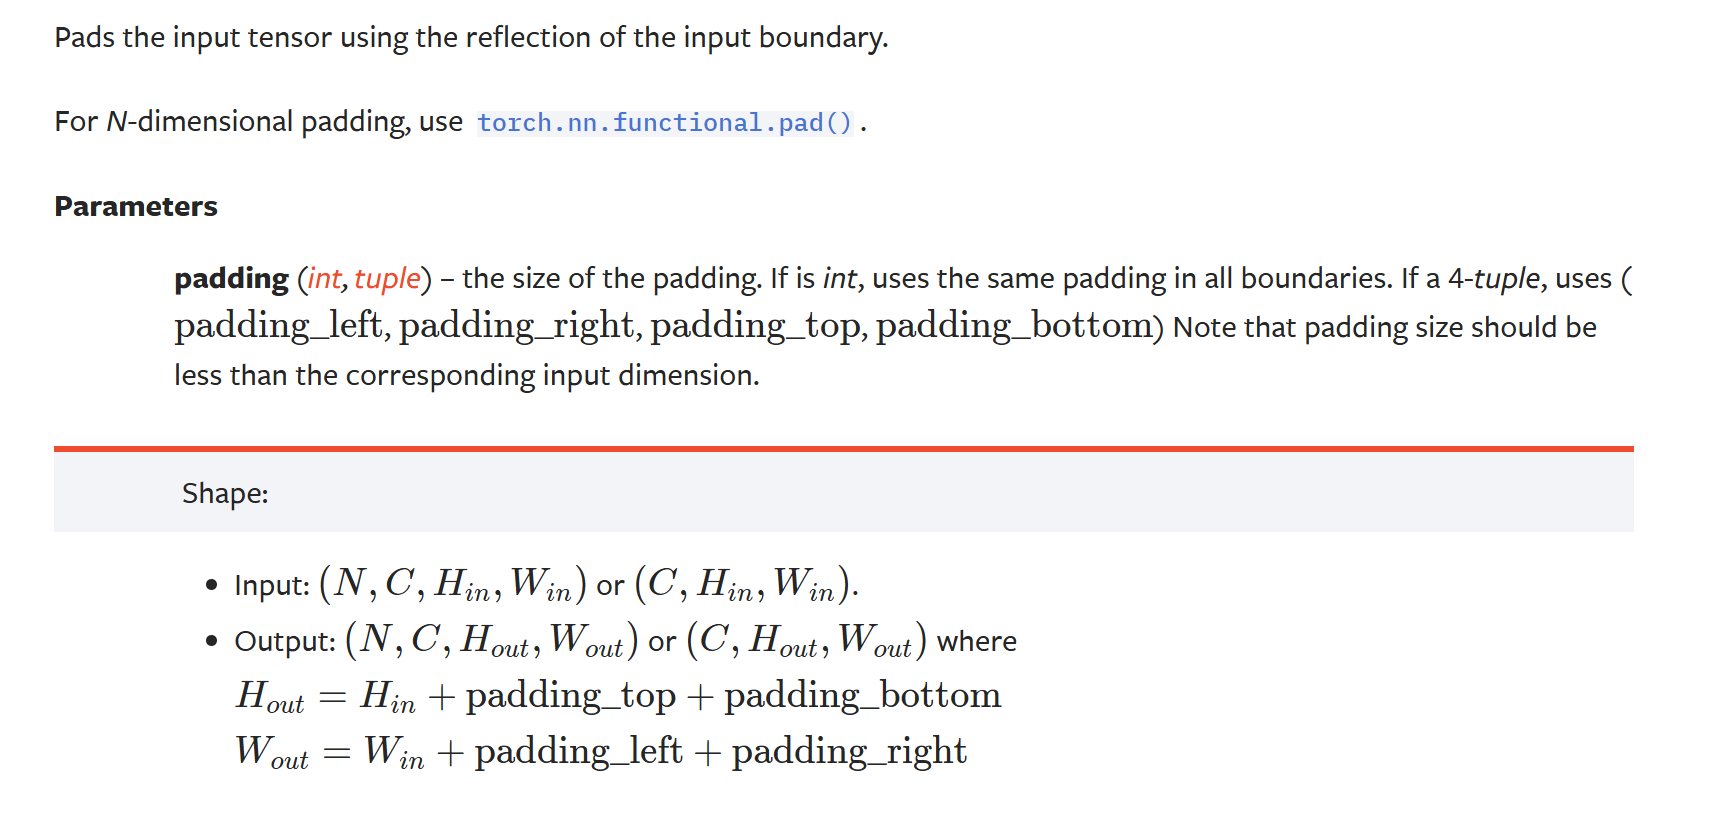


In [27]:
m = nn.ReflectionPad2d(2)
input = torch.arange(9, dtype=torch.float).reshape(1, 1, 3, 3)
input
m(input)
# using different paddings for different sides
m = nn.ReflectionPad2d((1, 1, 2, 0))
m(input)

tensor([[[[7., 6., 7., 8., 7.],
          [4., 3., 4., 5., 4.],
          [1., 0., 1., 2., 1.],
          [4., 3., 4., 5., 4.],
          [7., 6., 7., 8., 7.]]]])

# 归一化层



In [29]:
# With Learnable Parameters
m = nn.BatchNorm2d(100)
# Without Learnable Parameters
m = nn.BatchNorm2d(100, affine=False)
input = torch.randn(20, 100, 35, 45)

output = m(input)
print(output)
nn.RNNBase

tensor([[[[-2.8492e-01,  8.7643e-02,  2.4436e-01,  ..., -5.8271e-01,
           -1.0384e-01,  7.5617e-01],
          [ 5.1169e-01,  1.1690e+00, -6.8426e-01,  ..., -1.9729e+00,
            3.8184e-02, -1.8730e+00],
          [-1.9119e+00, -2.4953e-01, -6.1590e-02,  ...,  4.5222e-01,
           -5.1704e-02, -3.2439e-01],
          ...,
          [-6.0080e-01, -8.9095e-01,  8.9519e-01,  ...,  1.1215e+00,
           -1.8779e+00, -1.4227e-01],
          [ 1.2863e-02, -7.8178e-02,  1.3210e+00,  ..., -1.6685e+00,
            1.4701e+00,  5.2827e-01],
          [-6.1048e-01,  6.8578e-01,  1.6050e-01,  ...,  9.0896e-02,
            8.8298e-01,  3.9898e-01]],

         [[-2.8513e-01,  8.4162e-01, -9.2345e-02,  ..., -1.0741e+00,
            1.2486e+00, -6.9556e-01],
          [-4.2703e-01,  1.3460e+00,  3.7079e-01,  ...,  1.0037e+00,
           -1.6755e-01,  1.3263e+00],
          [ 4.4557e-02,  7.4862e-01,  6.3612e-01,  ...,  9.3883e-01,
           -6.8943e-02,  4.1508e-01],
          ...,
     